#### Newyork City AirBnb Outlier analysis

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df=pd.read_csv('data/AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [13]:
df.shape

(48895, 16)

<Axes: ylabel='price'>

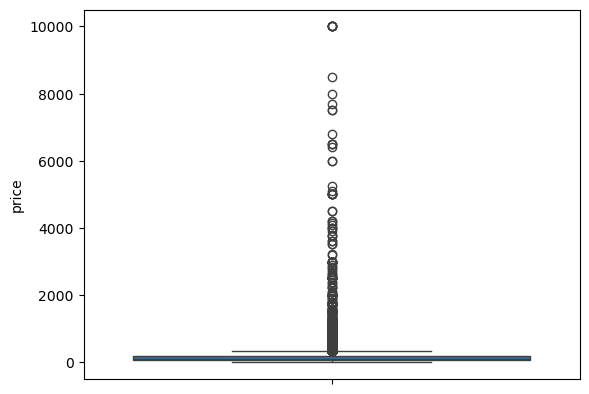

In [15]:
sns.boxplot(df['price'])

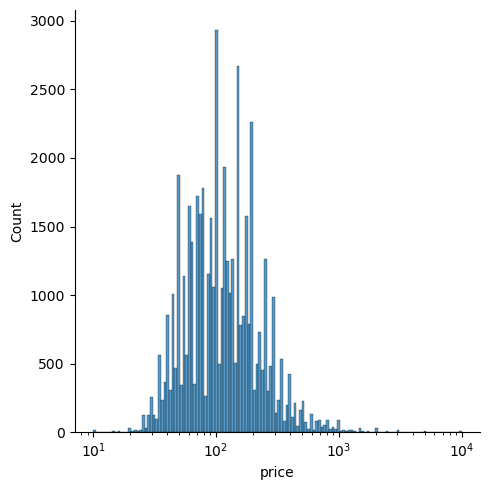

In [17]:
sns.displot(df['price'],log_scale=True)

#### outlier detection using percentile

In [23]:
q1=df['price'].quantile(0.25)
q3=df['price'].quantile(0.75)
iqr=q3-q1
min_threshold=q1-1.5*iqr
max_threshold=q3+1.5*iqr

df1=df[(df['price']<min_threshold)|(df['price']>max_threshold)]
df1.shape[0]

2972

In [26]:
df2=df[(df['price']>min_threshold)&(df['price']<max_threshold)]
df2.shape[0]

45918

In [28]:
df.shape[0]-df2.shape[0]

2977

<Axes: ylabel='price'>

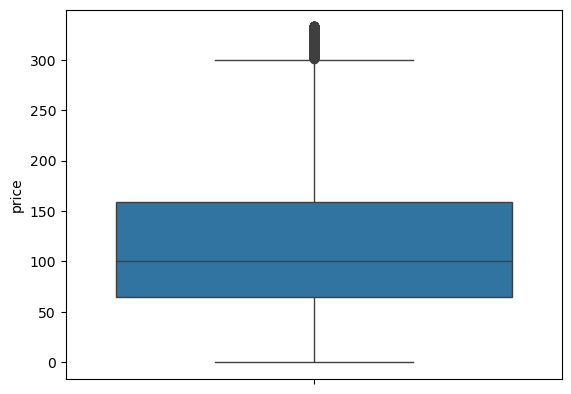

In [29]:
sns.boxplot(df2['price'])

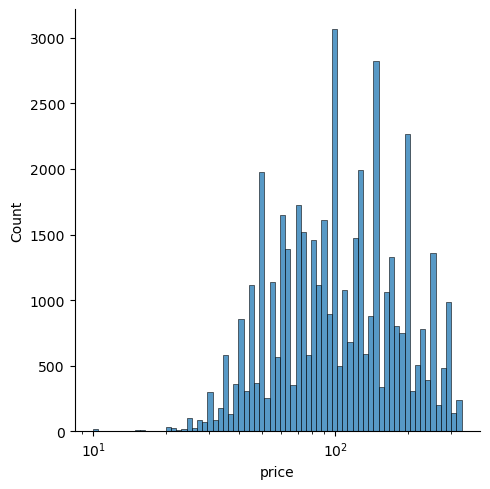

In [30]:
sns.displot(df2['price'],log_scale=True)

#### remove outliers using 3 standard deviations

In [32]:
mean_price=df['price'].mean()
std_price=df['price'].std()

upper_limit=mean_price+3*std_price
lower_limit=mean_price-3*std_price

df3=df[(df['price']<lower_limit)|(df['price']>upper_limit)]
df3.shape[0]

388

In [34]:
df4=df[(df['price']>lower_limit)&(df['price']<upper_limit)]
df4['price'].describe()

count    48507.000000
mean       138.746903
std        107.558233
min          0.000000
25%         69.000000
50%        105.000000
75%        175.000000
max        860.000000
Name: price, dtype: float64

<Axes: ylabel='price'>

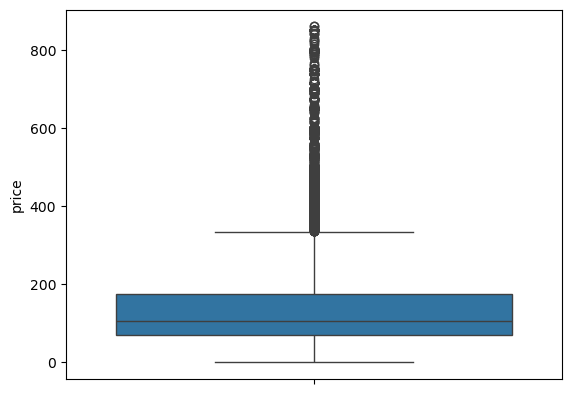

In [35]:
sns.boxplot(df4['price'])

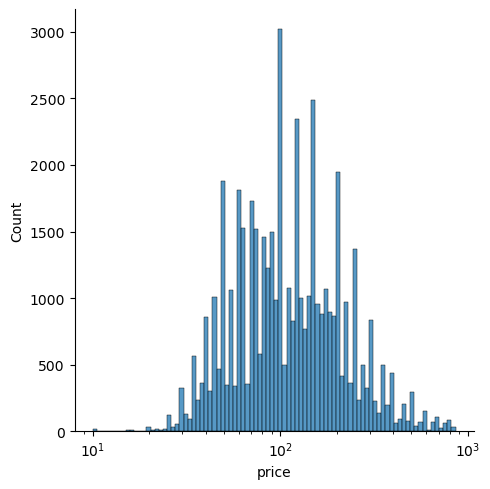

In [36]:
sns.displot(df4['price'],log_scale=True)

#### remove outliers using z_score

In [39]:
z_score=(df['price']-df['price'].mean())/df['price'].std()
df5=df.copy()
df5['z_score']=z_score
df5['z_score'].head()

0   -0.015493
1    0.300970
2   -0.011329
3   -0.265332
4   -0.302808
Name: z_score, dtype: float64

In [40]:
df5[(df5['z_score']<-3)|(df5['z_score']>3)].shape[0]

388

In [42]:
df6=df5[(df5['z_score']>-3)&(df5['z_score']<3)]
df6.shape[0]

48507

In [43]:
df.shape[0]-df6.shape[0]

388

<Axes: ylabel='price'>

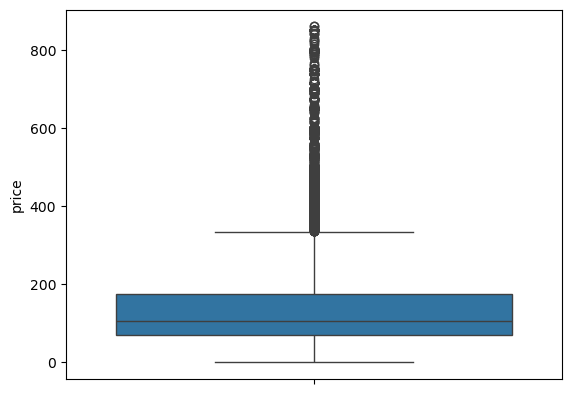

In [44]:
sns.boxplot(df6['price'])